In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
① アヤメデータの読み込み
50行目までがセトナ
51-100行目までがバーシクル
101-150行目までがバージニカ
"""
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


In [0]:
""""
② セトナとバーシクルのデータを使用する = 100行目までのデータ
教師データ
今回はセトナ：-1, バーシクル:1 とする
"""
y = iris_data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)


In [4]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

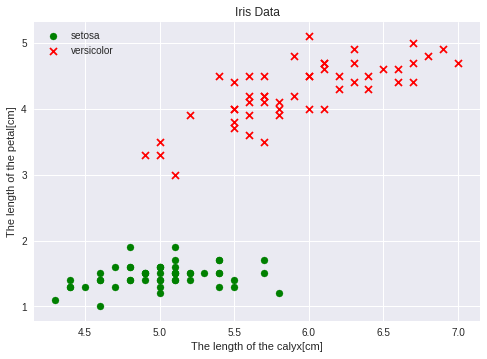

In [3]:
""""
学習データ(行列)
今回は、4種類全部は使用せず、
がくの長さと花弁の長さの2次元データを学習させる
  がくの長さ:1列目
  花弁の長さ:3列目
"""
X = iris_data.iloc[0:100, [0, 2]].values

# 学習データを可視化
plt.scatter(X[:50,0], X[:50,1], color='green', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='red', marker='x', label='versicolor')
plt.title("Iris Data")
plt.xlabel('The length of the calyx[cm]')
plt.ylabel('The length of the petal[cm]')
plt.legend(loc='upper left')
plt.show()


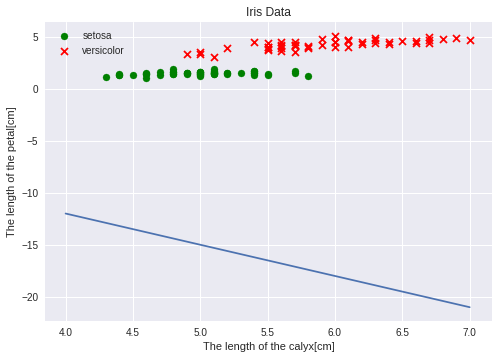

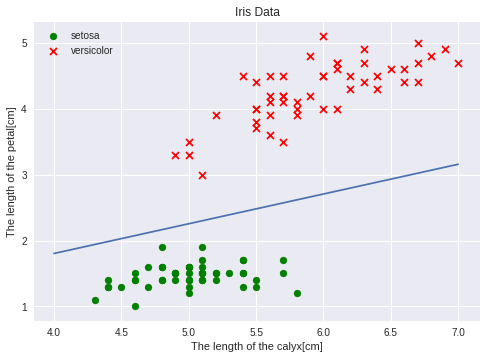

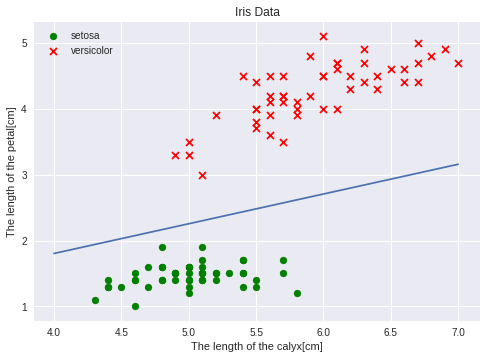

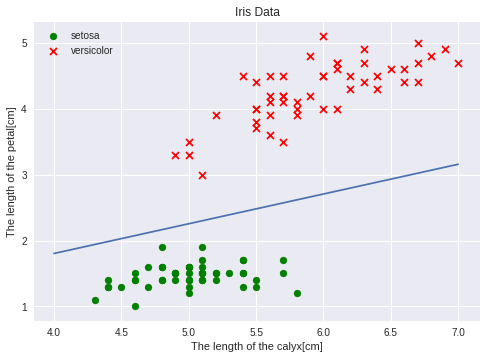

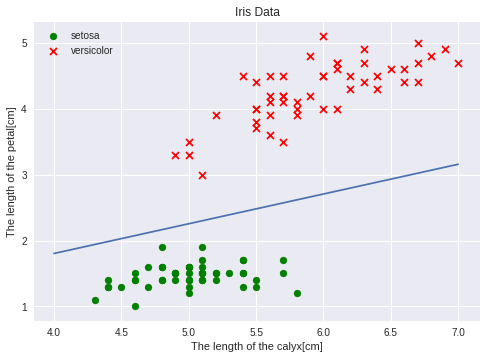

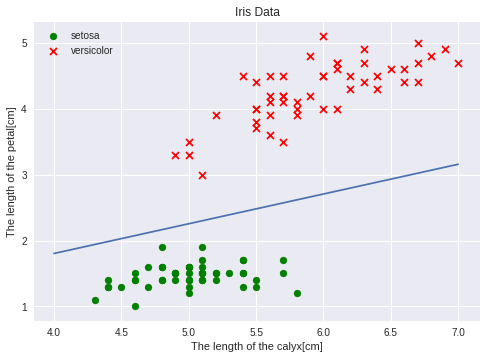

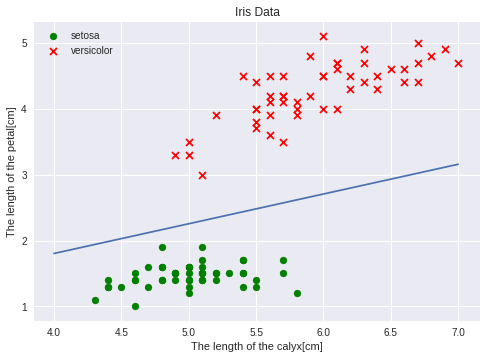

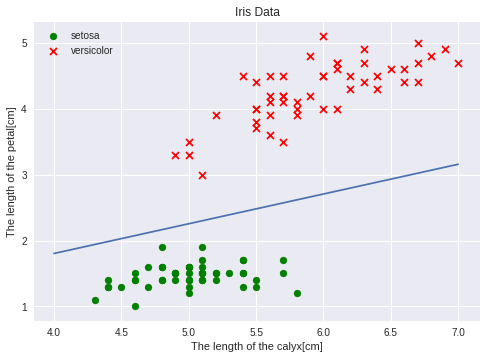

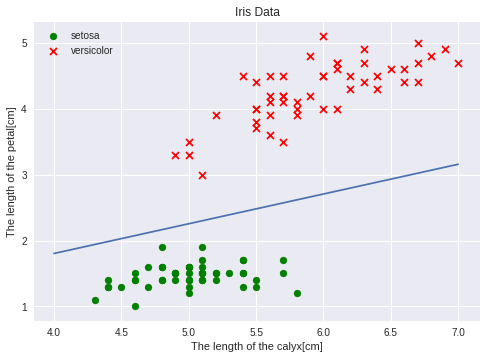

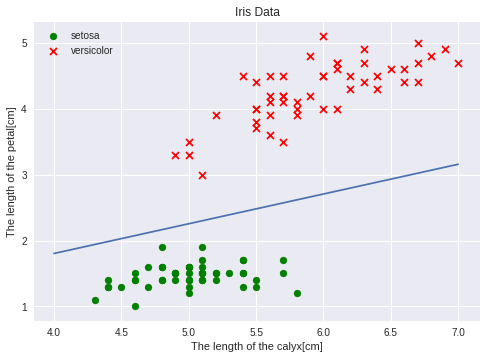

In [7]:

"""
③ パーセプトロンの学習を行う関数
w 重み（ベクトル）
x 入力（ベクトル）
y 教師（スカラー）
"""
def train(w, x, y):
    #学習率
    eta = 0.5

    """
    今回誤差は、荷重と教師のスカラ積1未満の場合は、
    誤差ありと判定し、学習率に従い、重みを更新する。
    """
    if (np.dot(w,x) * y < 0):
        w_new = w + y * eta * x
        return w_new
    else:
        return w

# 重み 初期値は適当な値
w = np.array([1,-1])

# 学習回数
epoch = 30

for e in range(epoch):
    for x_data, y_data in zip(X, y):
        w = train(w, x_data, y_data)

    """"
    学習を可視化
    学習回数3回毎に表示
    """
    if e % 3 == 0:
      plt.scatter(X[:50,0], X[:50,1], color='green', marker='o', label='setosa')
      plt.scatter(X[50:100,0], X[50:100,1], color='red', marker='x', label='versicolor')
      x_fig = np.array(range(4,8))
      y_fig = -(w[0]/w[1])*x_fig
      plt.plot(x_fig,y_fig)
      plt.title("Iris Data")
      plt.xlabel('The length of the calyx[cm]')
      plt.ylabel('The length of the petal[cm]')
      plt.legend(loc='upper left')
      plt.show()

#print w